In [1]:
#Basic necessary Libraries
import numpy as np
import pandas as pd

#Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('customer_shopping_data.csv')
df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [3]:
#Drop any unnecessary columns:
df = df.drop(['customer_id','invoice_no','shopping_mall'], axis=1)
df

,gender,age,category,quantity,price,payment_method,invoice_date
0,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022
1,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021
2,Male,20,Clothing,1,300.08,Cash,9/11/2021
3,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021
4,Female,53,Books,4,60.60,Cash,24/10/2021
...,...,...,...,...,...,...,...
99452,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022
99453,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021
99454,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021
99455,Male,56,Technology,4,4200.00,Cash,16/03/2021


In [4]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'])
# Year
df['year'] = df['invoice_date'].dt.strftime("%Y")

# Month
df['month'] = df['invoice_date'].dt.strftime("%m")

# Weekday
df['weekday'] = df['invoice_date'].dt.strftime("%w")

# Day
df['day'] = df['invoice_date'].dt.strftime("%d")

# Total Price
df['total_price'] = df['quantity'] * df['price']
def age_cat(age):
    if age < 18:
        return 'Tennagers'
    elif age >= 18 and age < 30:
        return 'Young'
    elif age >= 30 and age < 50:
        return 'Middle'
    else:
        return 'old'

# Age  cat
df['age_cat'] = df['age'].apply(age_cat)
df.sample(10)

C:\Users\tarak\AppData\Local\Temp\ipykernel_18468\3845074700.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['invoice_date'] = pd.to_datetime(df['invoice_date'])


,gender,age,category,quantity,price,payment_method,invoice_date,year,month,weekday,day,total_price,age_cat
19644,Female,37,Technology,5,5250.00,Credit Card,2022-05-08,2022,05,0,08,26250.00,Middle
66803,Male,41,Toys,1,35.84,Debit Card,2021-11-19,2021,11,5,19,35.84,Middle
133,Female,50,Clothing,5,1500.40,Cash,2021-06-20,2021,06,0,20,7502.00,old
43531,Male,62,Cosmetics,4,162.64,Cash,2022-05-21,2022,05,6,21,650.56,old
34290,Female,62,Clothing,1,300.08,Debit Card,2021-05-01,2021,05,6,01,300.08,old
19385,Male,46,Technology,1,1050.00,Credit Card,2022-09-10,2022,09,6,10,1050.00,Middle
48184,Female,19,Clothing,5,1500.40,Credit Card,2021-06-04,2021,06,5,04,7502.00,Young
9379,Female,35,Clothing,1,300.08,Cash,2022-02-11,2022,02,5,11,300.08,Middle
51178,Male,53,Cosmetics,2,81.32,Credit Card,2021-05-05,2021,05,3,05,162.64,old
35534,Female,53,Food & Beverage,4,20.92,Cash,2021-10-05,2021,10,2,05,83.68,old


In [5]:

def Distribution_df(df, column):
    return df.groupby(column)['quantity'].sum()
gender_df=Distribution_df(df,'gender')
gender_df

gender
Female    178659
Male      120053
Name: quantity, dtype: int64

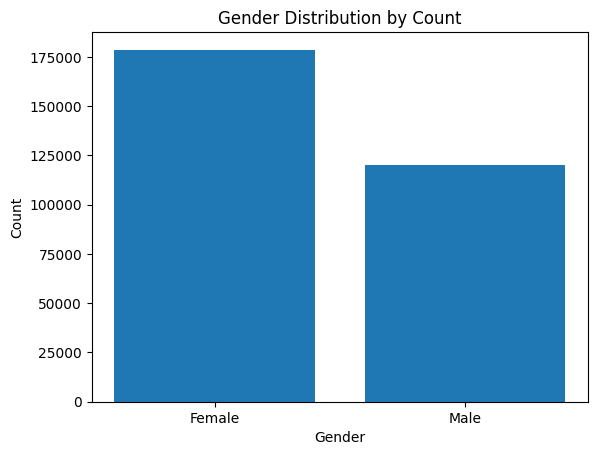

In [6]:
# Calculate total revenue by gender
gender_df = df.groupby('gender').agg({'quantity': 'sum', 'total_price': 'sum'})

# Create bar chart for gender distribution
plt.bar(gender_df.index, gender_df['quantity'])
plt.title('Gender Distribution by Count')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

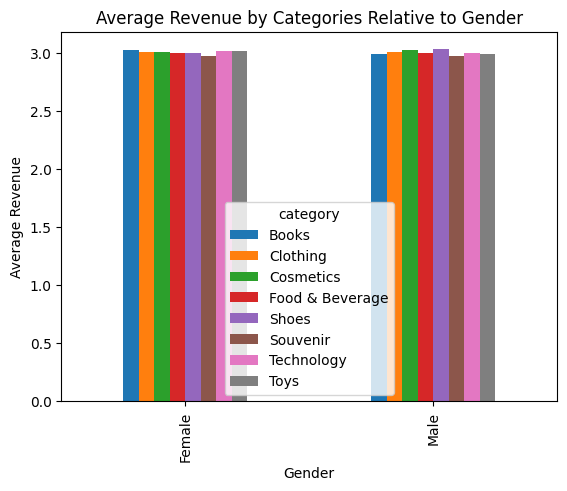

In [7]:
# create a pivot table to calculate the average revenue by categories relative to gender
pivot_table = pd.pivot_table(df, index='gender', columns='category', values='quantity')

# plot the bar graph
pivot_table.plot(kind='bar')
plt.title('Average Revenue by Categories Relative to Gender')
plt.xlabel('Gender')
plt.ylabel('Average Revenue')
plt.show()

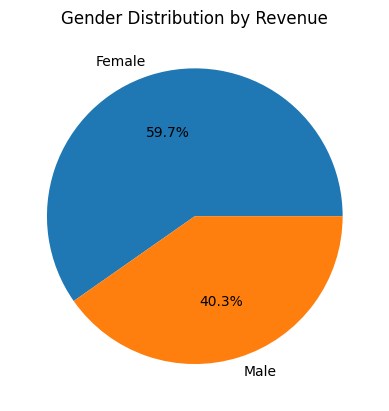

Index(['quantity', 'total_price'], dtype='object')


In [8]:
# Create pie chart for revenue by gender
plt.pie(gender_df['total_price'], labels=gender_df.index, autopct='%1.1f%%')
plt.title('Gender Distribution by Revenue')
plt.show()
print(gender_df.columns)

C:\Users\tarak\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


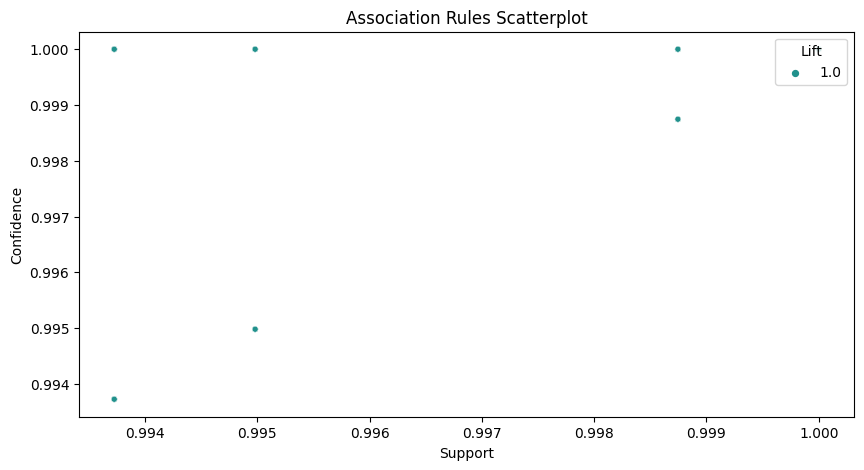

In [9]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Prepare the data for apriori algorithm
transactions = df.groupby(['invoice_date', 'category'])['quantity'].sum().unstack().reset_index().fillna(0).set_index('invoice_date')

# Convert the values to binary
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

transactions = transactions.applymap(encode_units)

# Apply the apriori algorithm
frequent_itemsets = apriori(transactions, min_support=0.05, use_colnames=True)

# Calculate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules

# Visualize the association rules
plt.figure(figsize=(10, 5))
sns.scatterplot(x=rules['support'], y=rules['confidence'], size=rules['lift'], hue=rules['lift'], palette='viridis')
plt.title('Association Rules Scatterplot')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.legend(title='Lift', loc='upper right')
plt.show()


count    99457.000000
mean      2528.789268
std       4222.475781
min          5.230000
25%        136.350000
50%        600.170000
75%       2700.720000
max      26250.000000
Name: total_price, dtype: float64


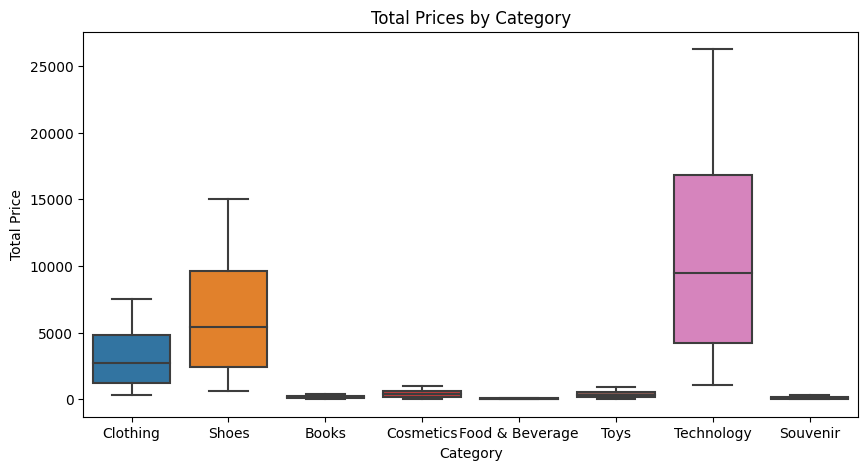

In [10]:
# Additional statistical analysis - describe the 'total_price' column
price_stats = df['total_price'].describe()
print(price_stats)

# Data visualization - boxplot for total prices by category
plt.figure(figsize=(10, 5))
sns.boxplot(x='category', y='total_price', data=df)
plt.title('Total Prices by Category')
plt.xlabel('Category')
plt.ylabel('Total Price')
plt.show()


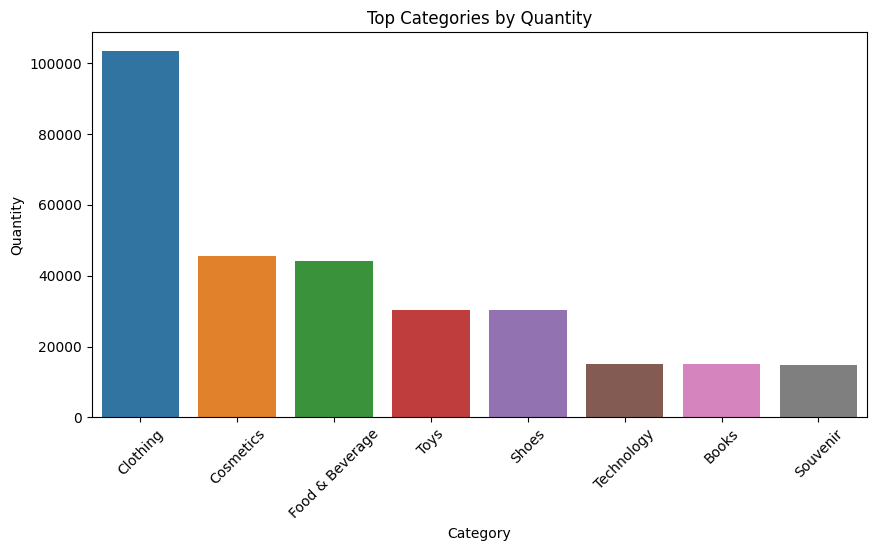

In [11]:
# Top categories by quantity
top_categories = df.groupby('category')['quantity'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_categories.index, y=top_categories.values)
plt.title('Top Categories by Quantity')
plt.xlabel('Category')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.show()


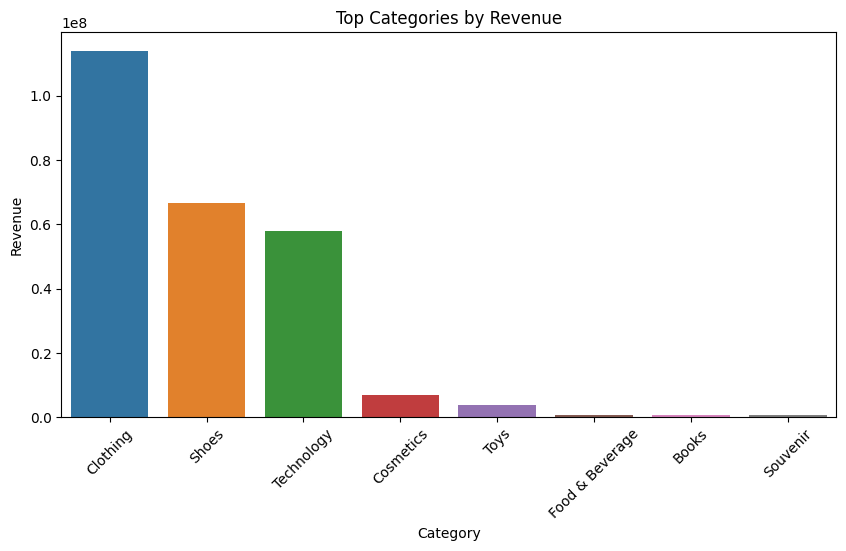

In [12]:
# Top categories by revenue
top_revenue_categories = df.groupby('category')['total_price'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_revenue_categories.index, y=top_revenue_categories.values)
plt.title('Top Categories by Revenue')
plt.xlabel('Category')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()


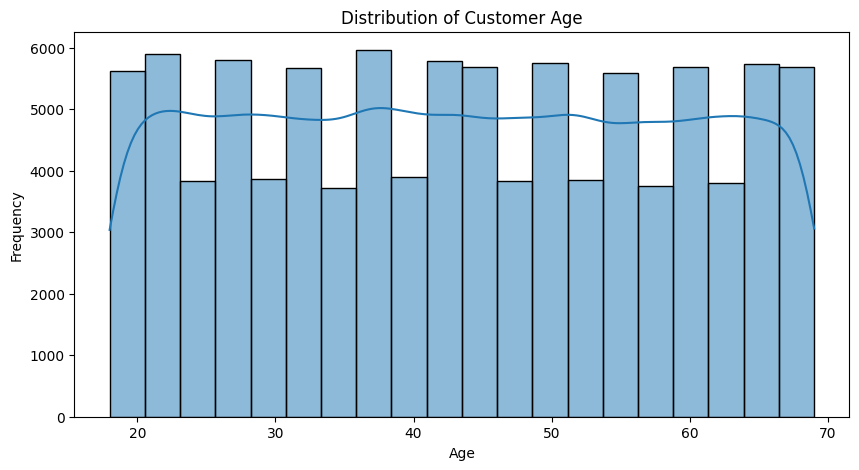

In [13]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='age', bins=20, kde=True)
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


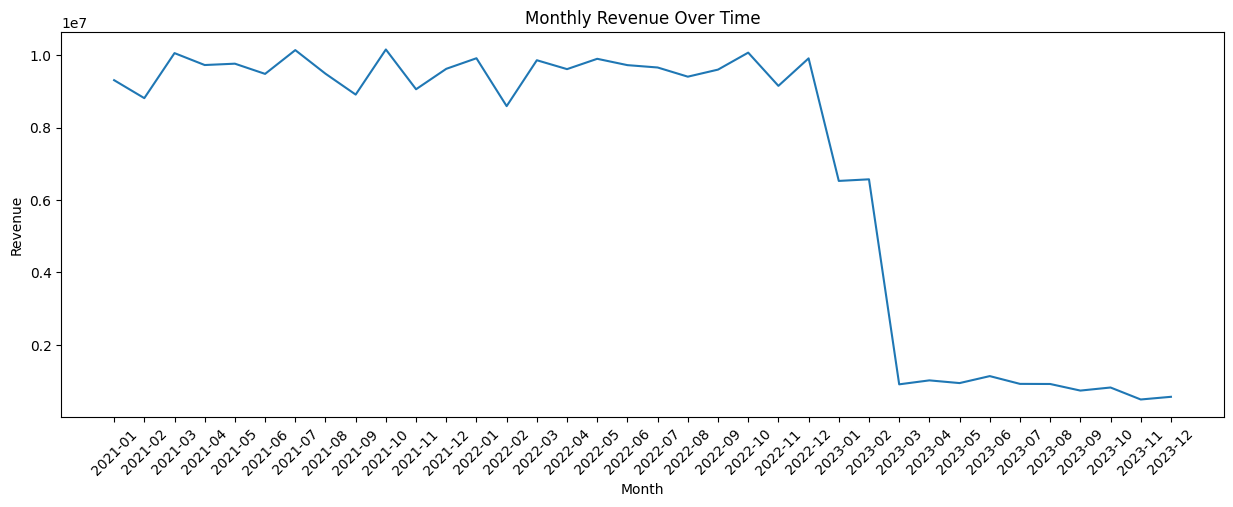

In [14]:
monthly_revenue = df.groupby(['year', 'month'])['total_price'].sum().reset_index()
monthly_revenue['year_month'] = monthly_revenue['year'] + '-' + monthly_revenue['month']

plt.figure(figsize=(15, 5))
sns.lineplot(x='year_month', y='total_price', data=monthly_revenue)
plt.title('Monthly Revenue Over Time')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()


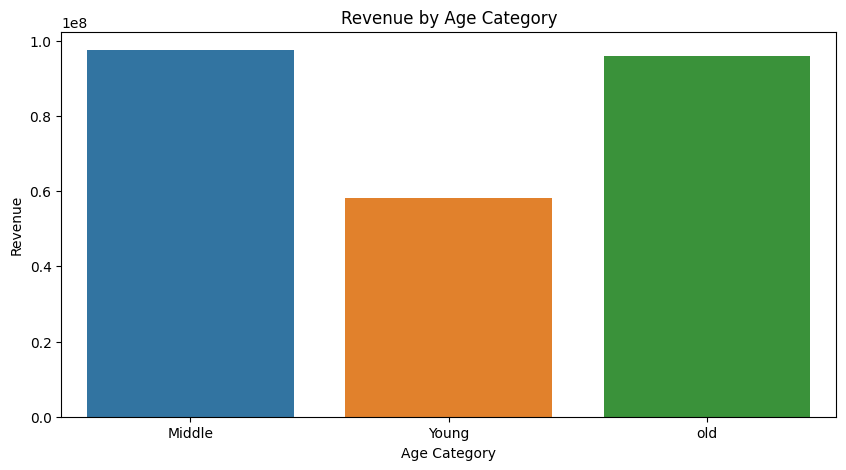

In [15]:
age_revenue = df.groupby('age_cat')['total_price'].sum()

plt.figure(figsize=(10, 5))
sns.barplot(x=age_revenue.index, y=age_revenue.values)
plt.title('Revenue by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Revenue')
plt.show()


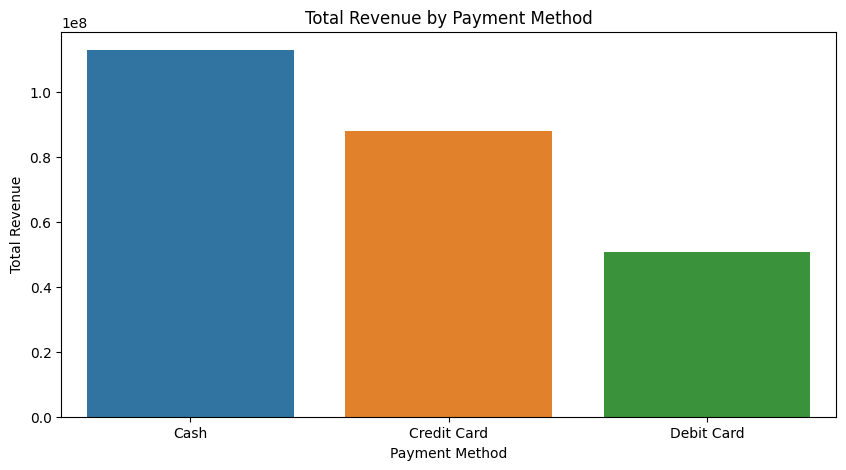

In [16]:
payment_revenue = df.groupby('payment_method')['total_price'].sum()

plt.figure(figsize=(10, 5))
sns.barplot(x=payment_revenue.index, y=payment_revenue.values)
plt.title('Total Revenue by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Total Revenue')
plt.show()


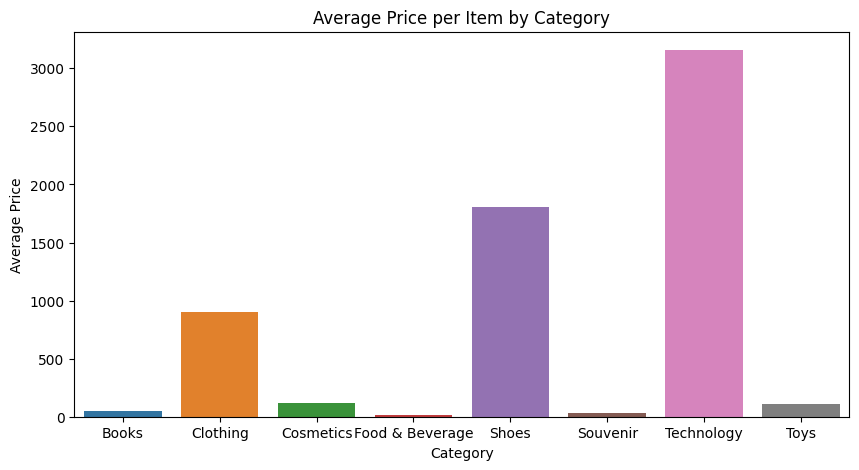

In [17]:
average_price = df.groupby('category')['price'].mean()

plt.figure(figsize=(10, 5))
sns.barplot(x=average_price.index, y=average_price.values)
plt.title('Average Price per Item by Category')
plt.xlabel('Category')
plt.ylabel('Average Price')
plt.show()


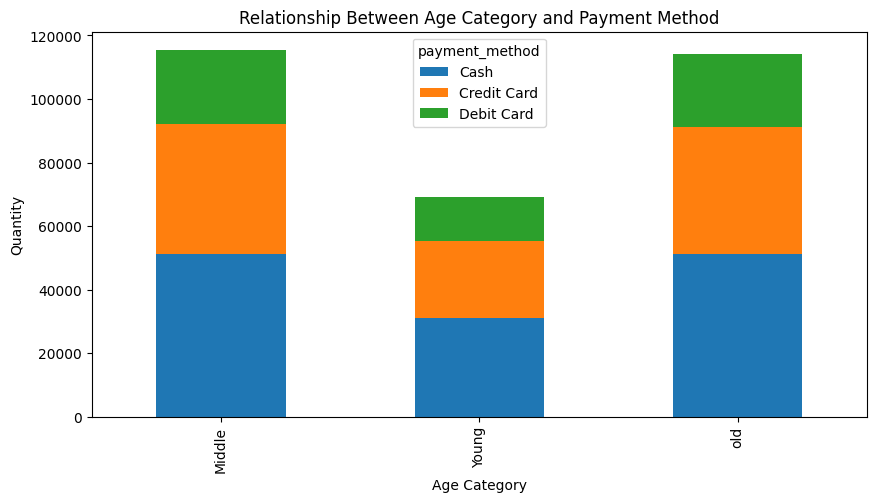

In [18]:
age_payment = df.groupby(['age_cat', 'payment_method'])['quantity'].sum().unstack()

age_payment.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.title('Relationship Between Age Category and Payment Method')
plt.xlabel('Age Category')
plt.ylabel('Quantity')
plt.show()
